In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from math import pi

$$\begin{aligned}P(|Z| > z) &= P(Z > z) + P(-Z > z)\\&= (1 - P(Z <z)) + P(Z < -z) \\&= 1 - cdf(z) + cdf(-z)\end{aligned}$$

In [2]:
x = np.linspace(1.9, 3, 100)
cdf_dict = dict()
cdf_dict['normal'] = 1 - scipy.stats.norm.cdf(x) + scipy.stats.norm.cdf(-x)
cdf_dict['t_30'] = 1 - scipy.stats.t.cdf(x, 30) + scipy.stats.t.cdf(-x, 30)
cdf_dict['t_100'] = 1 - scipy.stats.t.cdf(x, 100) + scipy.stats.t.cdf(-x, 100)
p = [0.05, 0.01]

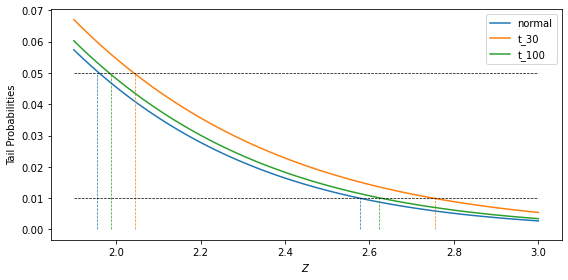

In [3]:
plt.figure(figsize=(8, 4))
for i, cdf_key in enumerate(cdf_dict.keys()):
    plt.plot(x, cdf_dict[cdf_key], color='C{}'.format(i), label=cdf_key)
    for p_ in p:
        # find index where cdf = p_ or cdf ~= p_ because there is no data point where cdf = p exactly.
        idx = np.argmin(np.abs(cdf_dict[cdf_key] - p_))
        x_ = [x[idx], x[idx]]
        y_ = [0, p_]
        plt.plot(x_, y_, '--', color='C{}'.format(i), linewidth=0.7)
    

plt.xlabel('$Z$')
plt.ylabel('Tail Probabilities', rotation=90)
plt.legend()
plt.plot(x, 0.05 * np.ones_like(x), '--k', linewidth=0.7)
plt.plot(x, 0.01 * np.ones_like(x), '--k', linewidth=0.7)
plt.tight_layout()